<a href="https://colab.research.google.com/github/rachithad267/MachineLearningProject/blob/master/MLproject_carDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP-1** 

1.1 Importing necessary libraries

---



In [1]:
import pandas as pd               #data preprocessing lib
import numpy as np                #data preprocessing lib
import seaborn as sns             #visualisation lib
import matplotlib.pyplot as plt   #visualisation lib
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.2 Importing dataset

---



In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


1.3 Loading data into dataframe

---



In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [6]:
df.head(5)        #display first 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df.tail(5)        #display last 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


1.4 Checking the data types

---



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

1.5 Statistical summary

---



In [9]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


1.6 Shape of the dataframe

---



In [10]:
df.shape

(11914, 16)

1.7 Checking for null values

---



In [11]:
df.isna()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**STEP-2**

Dropping irrelevant columns

---



> Here we can drop the 'Market Category' column since we have many missing values in that column. We can also drop the 'Engine Fuel Type' and 'Number of Doors' columns as they seem to be of less relevance to our purpose.



In [12]:
df=df.drop(['Engine Fuel Type','Number of Doors','Market Category'],axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


**STEP-3**

3.1 Renaming the Columns

---



> Here, we are renaming the columns Engine HP as HP, Engine Cylinders as Cylinders, Transmission Type as Transmission, Driven_Wheels as Drive Mode,highway MPG as MPG-H, city mpg as MPG-C, MSRP as Price to improve the readability.



In [13]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders","Transmission Type": "Transmission","Driven_Wheels": "Drive Mode","highway MPG": "MPG-H","city mpg": "MPG-C","MSRP": "Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


**STEP-4**

4.1 Dropping Duplicate Rows

---



> Here, we drop all the duplicate values from the dataset 



In [16]:
df.shape

(11122, 13)

In [14]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ",duplicate_rows_df.shape)

Number of duplicate rows:  (792, 13)


In [15]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [17]:
df.shape   #after removing duplicates

(11122, 13)

4.2 Dropping the missing values(null values)

---



> Here, we are deleting all the missing values in the dataset.







In [18]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [19]:
df = df.dropna()      #dropping missing values
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [20]:
print(df.isnull().sum())      #after dropping the missing values

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


**STEP-5**

5.1 Detecting Outliers

---



> Here, we are detecting the outliers and removing them to improve the accuracy of our model.







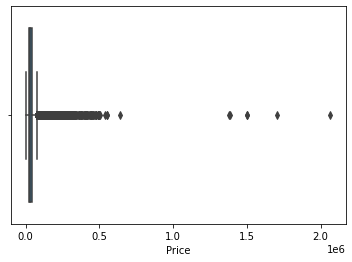

In [21]:
sns.boxplot(x=df['Price'])

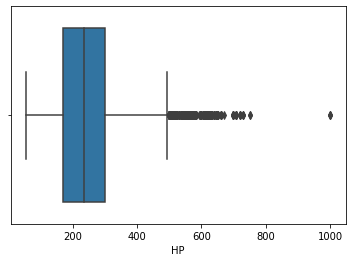

In [22]:
sns.boxplot(x=df['HP'])

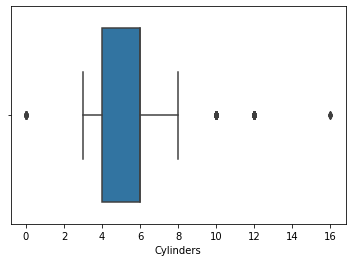

In [23]:
sns.boxplot(x=df['Cylinders'])

In [24]:
#finding the inter-quantile range
Q1 = df.quantile(0.25)      
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [26]:
df = df[-((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]    #removing outliers
df.shape                  #shape after removing outliers

(8546, 13)

**STEP-6**

Most represented car brands in the dataset

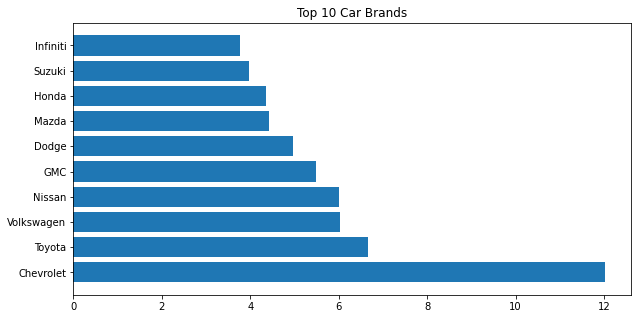

In [27]:
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())
popular_labels=counts.index[:10]   #determining top 10 car brands
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car Brands')
plt.show()

In [28]:
#Determining the average price of cars in each brand
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
                                  (df['Make'] == 'Ford')|
                                  (df['Make'] == 'Volkswagen')|
                                  (df['Make'] == 'Toyota')|
                                  (df['Make'] == 'Dodge')|
                                  (df['Make'] == 'Nissan')|
                                  (df['Make'] == 'GMC')|
                                  (df['Make'] == 'Honda')|
                                  (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)             

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


**STEP-7**

Plotting the Correlation Matrix

In [29]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


Findings:

> We can observe that there is a **high correlation** between **Cylinders and Horsepower**. This means that higher the number of cylinders, higher is the horsepower of the car.
Also, there is a high correlation between **Horsepower and Price** meaning that, more powerful the car is, higher the price.
There is a high correlation between **MPG-C and MPG-H** which says that when the MPG for city is more, automatically, the MPG on highways is more.

> There is a **high Anti-correlation** between **MPG-H, MPG-C and Cylinders** as the number of cylinders required increases when the MPG value is low.









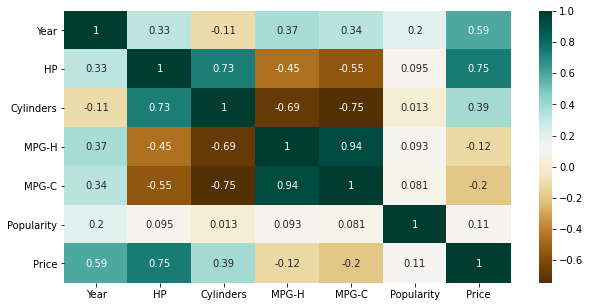

In [30]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap=("BrBG"),annot=True)



> Heatmap gives a better visualization of the correlation matrix. Here darker the blue,higher is the positive correlation and darker the brown, higher is the negative correlation.




**STEP-8**

**Exploratory Data Analysis**

Scatter Plot between HP and Price

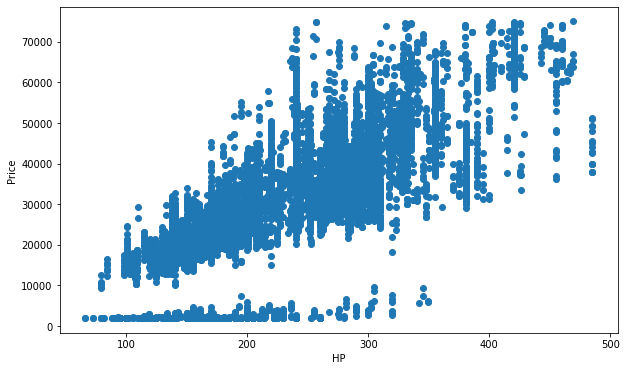

In [31]:
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(df['HP'],df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()



> Scatter Plot shows the correlation between two variables. It is clearly observed in the graph that there is a high correlation between HP and Price. The relationship between them is linear.



Knowing the most sold car type

Text(0.5, 0, 'Body Type')

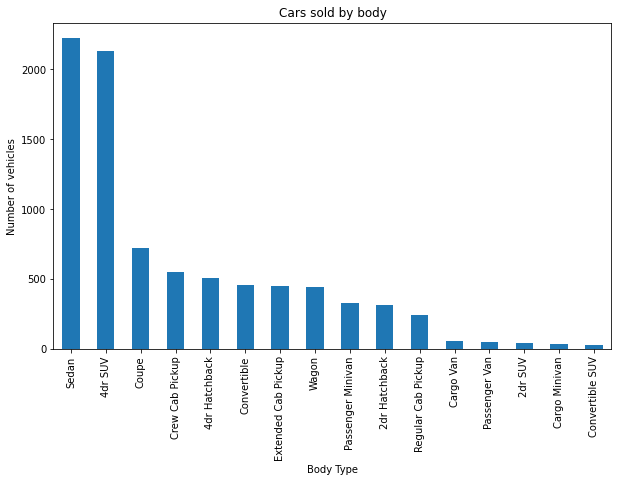

In [32]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Body Type')



> From the bar graph, it is observed that the most sold car type is Sedan with more than 2,250 cars sold, followed by 4dr SUV, Coupe, Crew Cab Pickup, 4dr Hatchback, etc.



Text(0.5, 0, 'number of vehicles')

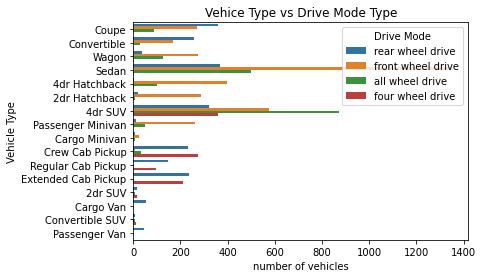

In [33]:
#stack bar graph
sns.countplot(y='Vehicle Style', data=df, hue='Drive Mode')
plt.title("Vehice Type vs Drive Mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('number of vehicles')



> The above stack bar graph is plotted to know what driving mode is most preferred. We can observe that the most preferred vehicle is Sedan with a front wheel drive mode. Next, 4dr SUV with all wheel drive mode is the second most preferred vehicle.



Creating new 'Price Group'

> Here, we are creating a new group called 'Price Group' to categorize the prices of the cars and assign the value based on the car price.


In [34]:
df['price_group']=pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000],
                         labels=['<20k','20-39k','40-59k','60-79k','80-99k','>100k'],include_lowest=True)
df['price_group']=df['price_group'].astype(object)

Text(0.5, 0, 'Price Group')

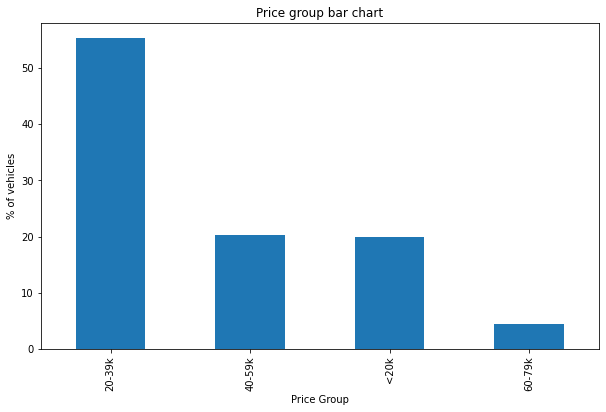

In [35]:
(df['price_group'].value_counts()/len(df)*100).plot.bar(figsize=(10,6))
plt.title("Price group bar chart")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group')



> Here, we can observe that there are more number of cars in the 20-39k price range with more than 50 cars and least number of cars in 60-79k price range with less than 10 cars. This categorization helps us to know the cars in what price range are more popular. 



**STEP-9**

**Splitting the dataset and building ML Model**


9.1 Scaling and Splitting the dataset

> Here we are splitting our dataset into 80:20 ratio where 80%of the data is used for training purpose and the remaining 20% is used for testing purpose.



In [45]:
X=df[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values   #independent variables
y=df['Price'].values    #target variable

In [47]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y.reshape(-1,1))

In [48]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

**STEP-10**

Applying different algorithms 

---



> 10.1 Polynomial Regression



In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

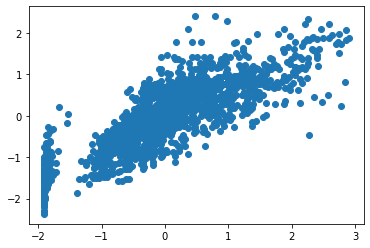

In [50]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

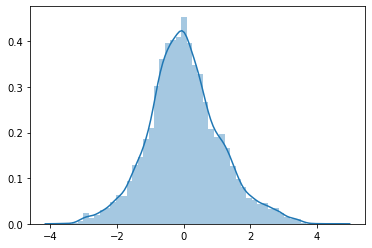

In [51]:
sns.distplot((X_test-y_pred),bins=50)    #checking for the residuals

In [52]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.425321106581984
Root Mean Squared Error: 0.6521664715254718
R2 Score: 0.6921834506523292


10.2 Polynomial Regression

In [53]:
#fitting Polynomial Regression into the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

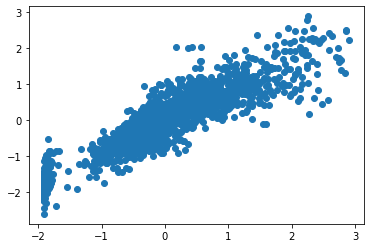

In [54]:
#predicting new result
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

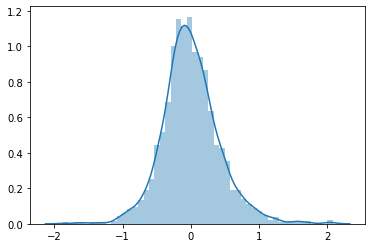

In [55]:
sns.distplot((y_test-y_pred),bins=50)

In [56]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.3139856957957374
Root Mean Squared Error: 0.560344265425941
R2 Score: 0.8173640165948802




> Here, we can observe a subsequent increase in the R^2 value than Linear Regression



10.3 SVR

In [57]:
#fitting SVR into the dataset
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

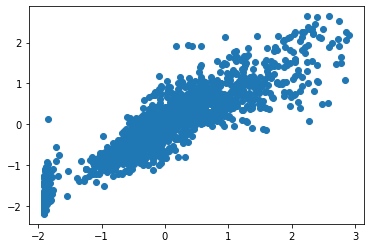

In [58]:
#predicting new result
y_pred=regressor.predict(X_test)
plt.scatter(y_test,y_pred)

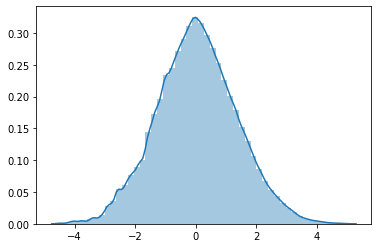

In [59]:
sns.distplot((y_test-y_pred),bins=50)

In [60]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.2989552402482394
Root Mean Squared Error: 0.5467679949011641
R2 Score: 0.8217697424497169




> Here, we can observe that there is no significant change in the R^2 value.



10.4 Random Forest

In [61]:
#fitting Random Forest Regression into the dataset
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

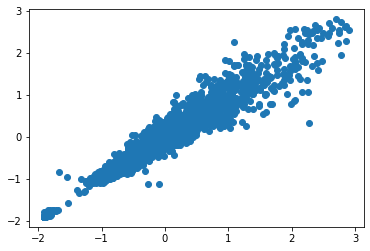

In [62]:
#predicting new result
y_pred=regressor.predict(X_test)
plt.scatter(y_test,y_pred)

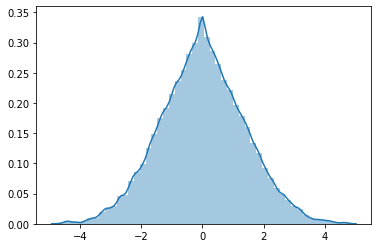

In [63]:
sns.distplot((y_test-y_pred),bins=50)

In [64]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.18264438770794214
Root Mean Squared Error: 0.4273691468835135
R2 Score: 0.9306486200031174




> Here in this, we can observe that the errors have been almost normalized. The R^2 value has increased a lot and also the RMSE value is decreased. This proves that Random Forest Algorithm is more useful than other algorithms. 

